### Student Information
Name: Takahiro Kawasaki

Student ID: 110033422

GitHub ID: Hiro626

Kaggle name: Takahiro Kawasaki(Previous) Hiro(Current)

Kaggle private scoreboard snapshot: 

[Snapshot](pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM2021-Lab2-master Repo](https://github.com/fhcalderon87/DM2021-Lab2-master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/c/dm2021-lab2-hw2/) regarding Emotion Recognition on Twitter. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Dec. 24th 11:59 pm, Friday)__. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 29th 11:59 pm, Wednesday)__. 

## 1. Data Preparation

In [2]:
# check and change the working directory
import os
os.getcwd()
new_wd = r'C:\Users\Hiro\Documents\Courses\Data Mining\DMLab2\DM2021-Lab2-HW2'
os.chdir(new_wd)
os.getcwd()

'c:\\Users\\Hiro\\Documents\\Courses\\Data Mining\\DMLab2\\DM2021-Lab2-HW2'

In [3]:
### Begin Assignment Here
import pandas as pd

# training data 
anger_train = pd.read_csv("anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("sadness-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train =pd.read_csv("joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [4]:
# concat emotions 
train_df = pd.concat([anger_train, sadness_train, fear_train, joy_train], ignore_index=True)

In [5]:
# testing data 
anger_test = pd.read_csv("anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [6]:
# combine 4 sub-dataset 
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)

In [7]:
# shuffle dataset 
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)
print("shape of Training df: ", train_df.shape)
print("shape of Testing df ", test_df.shape)

shape of Training df:  (3613, 4)
shape of Testing df  (347, 4)


### ** >>> Exercise 1 (Take home): **  

In [8]:
# Exercise 1 

def sentence_to_words(texts):
    word_list = [word.lower() for line in texts for word in line.split()] 
    return word_list

train_words_list = sentence_to_words(train_df["text"])
test_words_list = sentence_to_words(test_df["text"])

def wordList_to_sortedWordFreqDict(wordList):
    wordFreq = [wordList.count(w) for w in wordList]
    wordFreq_dict = dict(zip(wordList, wordFreq))
    sortedWordFreq = sorted(wordFreq_dict.items(), key=lambda item: item[1], reverse=True)
    return sortedWordFreq

train_wordFreq = wordList_to_sortedWordFreqDict(train_words_list)
test_wordFreq = wordList_to_sortedWordFreqDict(test_words_list)

<BarContainer object of 30 artists>

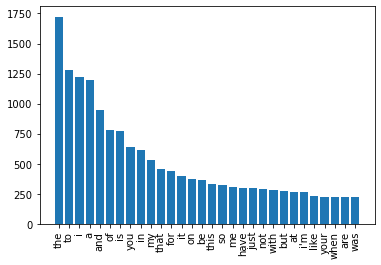

In [9]:
# bar plot without excluding stopwords 

word = [i[0] for i in train_wordFreq[:30]]
freq = [i[1] for i in train_wordFreq[:30]]

import matplotlib.pyplot as plt
plt.xticks(rotation=90)
plt.bar(word, freq)

In [10]:
# exclude stopwords

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = stopwords.words("english")
 
nonStopWords_train = [w for w in train_words_list if not w in stop_words]
nonStopWords_test = [w for w in test_words_list if not w in stop_words]

noPunc_train = [w for w in nonStopWords_train if w.isalpha()]
noPunc_test = [w for w in nonStopWords_test if w.isalpha()]

clean_trainFreqDict = wordList_to_sortedWordFreqDict(noPunc_train)
clean_testFreqDict = wordList_to_sortedWordFreqDict(noPunc_test)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hiro\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<BarContainer object of 30 artists>

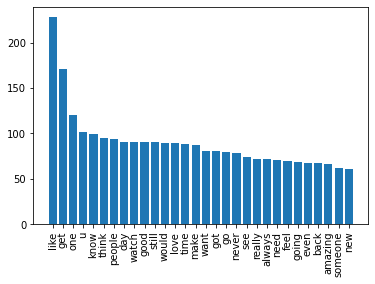

In [11]:
# generate bar plot
train_words = [i[0] for i in clean_trainFreqDict[:30]]
train_freq = [i[1] for i in clean_trainFreqDict[:30]]
plt.xticks(rotation=90)
plt.bar(train_words, train_freq)

<BarContainer object of 30 artists>

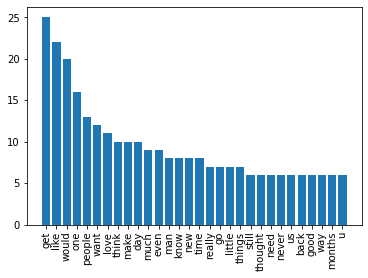

In [12]:
test_words = [i[0] for i in clean_testFreqDict[:30]]
test_freq = [i[1] for i in clean_testFreqDict[:30]]
plt.xticks(rotation=90)
plt.bar(test_words, test_freq)

### 1.3 Exploratory data analysis (EDA)

In [13]:
# check the counts of emotions
train_df.groupby(['emotion']).count()['text']

emotion
anger       857
fear       1147
joy         823
sadness     786
Name: text, dtype: int64

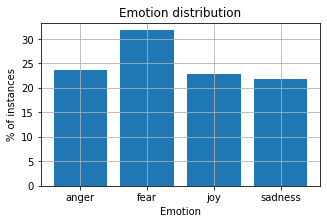

In [14]:
%matplotlib inline
import numpy as np

# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round((x/post_total)*100,3))

# plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index, df1.values)

# arrange 
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

## 2. Feature engineering 

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

In [16]:
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer()

In [17]:
# learn a vocabylary dict of all tokens u the raw documents
BOW_vectorizer.fit(train_df['text'])

# Transform documents to document-term matrix
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])
print(train_data_BOW_features)
type(train_data_BOW_features)

  (0, 1311)	1
  (0, 1504)	1
  (0, 3391)	1
  (0, 3476)	1
  (0, 3539)	1
  (0, 4263)	1
  (0, 4798)	1
  (0, 5051)	1
  (0, 5577)	1
  (0, 5665)	1
  (0, 5957)	1
  (0, 8264)	1
  (0, 8273)	1
  (0, 9340)	1
  (0, 9632)	1
  (0, 9850)	1
  (1, 1091)	1
  (1, 2226)	1
  (1, 2338)	1
  (1, 2447)	1
  (1, 6177)	1
  (2, 503)	1
  (2, 1860)	1
  (2, 2426)	1
  (2, 2557)	1
  :	:
  (3610, 8691)	1
  (3610, 8924)	2
  (3610, 9701)	1
  (3610, 9785)	1
  (3610, 10051)	1
  (3611, 840)	1
  (3611, 1912)	1
  (3611, 2120)	1
  (3611, 3013)	1
  (3611, 4442)	1
  (3611, 5458)	1
  (3611, 5541)	1
  (3611, 6098)	1
  (3611, 6235)	1
  (3611, 6422)	1
  (3611, 8236)	1
  (3611, 8973)	1
  (3611, 9530)	1
  (3611, 10054)	1
  (3612, 4221)	1
  (3612, 5093)	1
  (3612, 5321)	1
  (3612, 9119)	1
  (3612, 9318)	1
  (3612, 9467)	1


scipy.sparse.csr.csr_matrix

In [18]:
# add .toarray() to show
train_data_BOW_features.toarray()

# check the dimension
train_data_BOW_features.shape

(3613, 10115)

In [19]:
# observe some feature names 
feature_names = BOW_vectorizer.get_feature_names_out()
feature_names[100:110]

array(['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s',
       '31'], dtype=object)

In [20]:
"😂" in feature_names

False

In [21]:
import nltk 

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize)

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

# check dimension
train_data_BOW_features_500.shape

C:\Users\Hiro\mambaforge\envs\py37\lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"


(3613, 500)

In [22]:
train_data_BOW_features.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [23]:
feature_names_500 = BOW_500.get_feature_names_out()
feature_names_500[100:110]

array(['change', 'cheer', 'cheerful', 'cheerfully', 'cheering', 'cheery',
       'come', 'comes', 'could', 'country'], dtype=object)

In [24]:
"😂" in feature_names_500

True

### ** >>> Exercise 2 (Take home): ** 

In [25]:
# vectorize text column
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()

tfidf_vectorizer.fit(train_df['text'])

train_data_tfidf_features = tfidf_vectorizer.transform(train_df['text'])
# test_data_tfidf_features = tfidf_vectorizer.transform(test_df['text'])

print(train_data_tfidf_features)
type(train_data_tfidf_features)

  (0, 9850)	0.34031752655334113
  (0, 9632)	0.24212465268286437
  (0, 9340)	0.29412541531538905
  (0, 8273)	0.32822168307068034
  (0, 8264)	0.14477139847326748
  (0, 5957)	0.1279021834682005
  (0, 5665)	0.34031752655334113
  (0, 5577)	0.14044868369393126
  (0, 5051)	0.27264730672368437
  (0, 4798)	0.14753857261145129
  (0, 4263)	0.28969544060133
  (0, 3539)	0.24492874965249622
  (0, 3476)	0.28969544060133
  (0, 3391)	0.13264209229754753
  (0, 1504)	0.15520444138005302
  (0, 1311)	0.30469214950050155
  (1, 6177)	0.49374216550918043
  (1, 2447)	0.34387803065589306
  (1, 2338)	0.40917637403106905
  (1, 2226)	0.4761931781993747
  (1, 1091)	0.49374216550918043
  (2, 9808)	0.18875406051032556
  (2, 9012)	0.3592911607364383
  (2, 8930)	0.08621538955690107
  (2, 6728)	0.24773183032198579
  :	:
  (3610, 4120)	0.17031529297467154
  (3610, 4021)	0.28340657432015515
  (3610, 2993)	0.17421164452249033
  (3610, 2654)	0.2538581697873646
  (3610, 1448)	0.12328294890650109
  (3611, 10054)	0.28209177966

scipy.sparse.csr.csr_matrix

In [26]:
# to array
train_data_tfidf_features.toarray()
train_data_tfidf_features.shape

(3613, 10115)

In [27]:
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_feature_names[100:110]

array(['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s',
       '31'], dtype=object)

## 3. Model

In [28]:
# bag of words
from sklearn.tree import DecisionTreeClassifier

X_train = BOW_500.transform(train_df['text'])
Y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
Y_test =test_df['emotion']

print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', Y_train.shape)
print('X_test.shape: ', X_test.shape)
print('Y_test.shape: ', Y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
Y_test.shape:  (347,)


In [29]:
# decision tree
DT_model = DecisionTreeClassifier(random_state=0)

DT_model = DT_model.fit(X_train, Y_train)

y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

y_test_pred[:10]

array(['joy', 'anger', 'fear', 'anger', 'sadness', 'joy', 'fear', 'anger',
       'anger', 'sadness'], dtype=object)

## 4. Results Evaluation

In [30]:
# training and testing accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=Y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=Y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

training accuracy: 0.99
testing accuracy: 0.66


In [31]:
from sklearn.metrics import classification_report

print(classification_report(y_true=Y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.63      0.65      0.64        84
        fear       0.66      0.69      0.68       110
         joy       0.70      0.68      0.69        79
     sadness       0.65      0.59      0.62        74

    accuracy                           0.66       347
   macro avg       0.66      0.66      0.66       347
weighted avg       0.66      0.66      0.66       347



In [32]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=Y_test, y_pred=y_test_pred)
print(cm)

[[55 20  5  4]
 [16 76  8 10]
 [ 7  8 54 10]
 [ 9 11 10 44]]


In [33]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

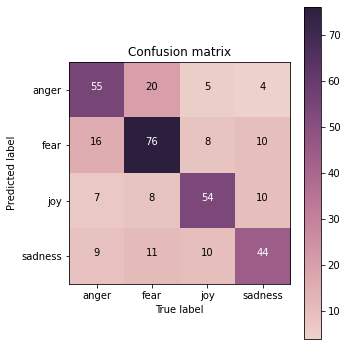

In [34]:
# confusion matrix
my_tags=['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

### ** >>> Exercise 3 (Take home): **  

The confusion matrix aboves tells that the prediction by the decision tree clasifier did a pretty job as the precison label and the true label are matched in the most of cases to classify emotions.  

### ** >>> Exercise 4 (Take home): **  

In [35]:
# MNB
from sklearn.naive_bayes import MultinomialNB

MNB_model = MultinomialNB()
MNB_model = MNB_model.fit(X_train, Y_train)

MNB_y_train_pred = MNB_model.predict(X_train)
MNB_y_test_pred = MNB_model.predict(X_test)

MNB_y_test_pred[:10]


array(['fear', 'fear', 'anger', 'fear', 'anger', 'joy', 'fear', 'anger',
       'fear', 'anger'], dtype='<U7')

In [36]:
acc_train = accuracy_score(y_true=Y_train, y_pred=MNB_y_train_pred)
acc_test = accuracy_score(y_true=Y_test, y_pred=MNB_y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

training accuracy: 0.79
testing accuracy: 0.7


              precision    recall  f1-score   support

       anger       0.63      0.65      0.64        84
        fear       0.73      0.77      0.75       110
         joy       0.78      0.71      0.74        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347



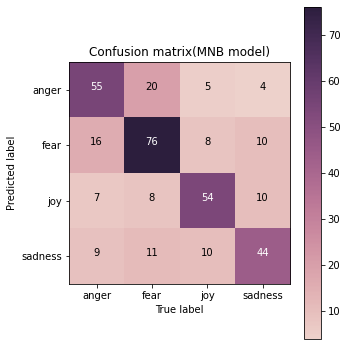

In [37]:
print(classification_report(y_true=Y_test, y_pred=MNB_y_test_pred))
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix(MNB model)')

### ** >>> Exercise 5 (Take home): **  

The training accuracy of the decision tree model is higher than the MNB model. The reason behind this could be the decision tree model can be more flexible to learn from data, but simultaneously, it could trigger overfitting. While the MNB model is generated based on probabilities, and learning could be less flexible compared to the decision model. Based on these reasons, the decision model shows the better accuracy this time, but the result could be opposite by what we want to do with data and what kind of information we want to extract.  

## 6. Deep Learning

In [38]:
import keras

X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

Using TensorFlow backend.
C:\Users\Hiro\mambaforge\envs\py37\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Hiro\mambaforge\envs\py37\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Hiro\mambaforge\envs\py37\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Hiro\mambaforge\envs\py37\lib\site-packag

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [39]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 3224        joy
1713       fear
916     sadness
2005       fear
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


In [40]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


In [41]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

model_input = Input(shape=(input_shape, ))
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)
H3 = Softmax()(H2_W3)

model_output = H3

model = Model(inputs=[model_input], outputs=[model_output])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 500)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                32064     
_________________________________________________________________
re_lu_1 (ReLU)               (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
re_lu_2 (ReLU)               (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 260       
_________________________________________________________________
softmax_1 (Softmax)          (None, 4)                 0   

In [42]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')


Train on 3613 samples, validate on 347 samples
Epoch 1/25
3613/3613 [==============================] - 0s 59us/step - loss: 1.3271 - accuracy: 0.3803 - val_loss: 1.2827 - val_accuracy: 0.4841
Epoch 2/25
3613/3613 [==============================] - 0s 34us/step - loss: 0.9884 - accuracy: 0.6571 - val_loss: 0.9493 - val_accuracy: 0.6455
Epoch 3/25
3613/3613 [==============================] - 0s 32us/step - loss: 0.5842 - accuracy: 0.7869 - val_loss: 0.8227 - val_accuracy: 0.7089
Epoch 4/25
3613/3613 [==============================] - 0s 28us/step - loss: 0.4203 - accuracy: 0.8456 - val_loss: 0.8177 - val_accuracy: 0.7032
Epoch 5/25
3613/3613 [==============================] - 0s 27us/step - loss: 0.3309 - accuracy: 0.8849 - val_loss: 0.8558 - val_accuracy: 0.6916
Epoch 6/25
3613/3613 [==============================] - 0s 28us/step - loss: 0.2727 - accuracy: 0.9001 - val_loss: 0.9313 - val_accuracy: 0.6715
Epoch 7/25
3613/3613 [==============================] - 0s 28us/step - loss: 0.223

In [43]:
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

array([[6.5644569e-04, 9.9873704e-01, 6.0360268e-04, 2.8778670e-06],
       [1.7331748e-05, 9.8419434e-01, 9.4783572e-06, 1.5778782e-02],
       [9.3786305e-01, 3.6880389e-02, 3.8860200e-03, 2.1370562e-02],
       [2.7526650e-03, 7.0167156e-03, 5.1064079e-04, 9.8971993e-01],
       [1.3962226e-02, 3.5918158e-02, 3.0377408e-04, 9.4981581e-01]],
      dtype=float32)

In [44]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['fear', 'fear', 'anger', 'sadness', 'sadness'], dtype=object)

In [45]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), 
        pred_result), 2)))

testing accuracy: 0.67


In [46]:
training_log = pd.DataFrame()
training_log = pd.read_csv('training_log.csv')
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.380293,1.327059,0.484150,1.282656
1,1,0.657072,0.988365,0.645533,0.949328
2,2,0.786881,0.584196,0.708934,0.822719
3,3,0.845558,0.420336,0.703170,0.817666
4,4,0.884860,0.330865,0.691643,0.855759
5,5,0.900083,0.272717,0.671470,0.931270
6,6,0.926377,0.223693,0.682997,1.008430
7,7,0.940493,0.190324,0.677233,1.078429
8,8,0.951287,0.159533,0.659942,1.094347
9,9,0.958760,0.141156,0.685879,1.172838


### ** >>> Exercise 6 (Take home): **  

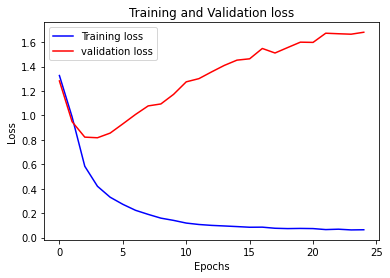

In [47]:
# training and validation loss
loss_train = training_log['loss']
loss_val = training_log['val_loss']
plt.plot(training_log['epoch'], training_log['loss'], 'b', label='Training loss')
plt.plot(training_log['epoch'], training_log['val_loss'], 'r', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

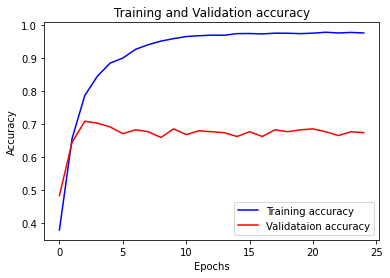

In [48]:
# training and validation accuracy
acc_train = training_log['accuracy']
acc_val = training_log['val_accuracy']
plt.plot(training_log['epoch'], training_log['accuracy'], 'b', label='Training accuracy')
plt.plot(training_log['epoch'], training_log['val_accuracy'], 'r', label='Validataion accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

The validation loss goes down with the training loss in the first plot, but suddently, it goes up. This means 3 in epochs is the turning point of the beginning of overfitting. The second plot depicts the training accuracy spikes till epochs 5, and the validation accuracy increases till 3, and both of them doesn"t show significant changes afterwards. From this, we can interpret the model we use improves the learning performance till epochs 5, but no significant improvement in training after the point. The accuracy in test dataset stops its improvement earlier than the training accuracy. 

In [49]:
import gensim

import warnings
warnings.filterwarnings('ignore')

train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
3224,30434,My friend just messaged me 'ugh I'm so hungry ...,"[My, friend, just, messaged, me, 'ugh, I, 'm, ..."
1713,20070,@BigBossPeltonen \nLikewise #death #cutting #d...,"[@, BigBossPeltonen, \nLikewise, #, death, #, ..."
916,40059,Am I the only person who dislikes fall? #First...,"[Am, I, the, only, person, who, dislikes, fall..."
2005,20362,"#internationaldayofpeace Want peace,prepare fo...","[#, internationaldayofpeace, Want, peace, ,, p..."
1161,40304,Shoutout to the drunk man on the bus who pisse...,"[Shoutout, to, the, drunk, man, on, the, bus, ..."


In [50]:
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

array([list(['My', 'friend', 'just', 'messaged', 'me', "'ugh", 'I', "'m", 'so', 'hungry', 'I', 'ca', "n't", 'wait', 'for', 'breakfast', "'", '#', 'socialmedia', '#', 'WineWednesday', '#', 'funny', '#', 'laughing']),
       list(['@', 'BigBossPeltonen', '\\nLikewise', '#', 'death', '#', 'cutting', '#', 'despair']),
       list(['Am', 'I', 'the', 'only', 'person', 'who', 'dislikes', 'fall', '?', '#', 'FirstDayofFall', '#', 'leaves', '#', 'thingsdie', '#', 'depressing', '#', 'cold', '#', 'noflipflops', '👎🏾👎🏽👎🏻🍂🍁'])],
      dtype=object)

In [51]:
train_df['text-tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
3224,30434,My friend just messaged me 'ugh I'm so hungry ...,"[My, friend, just, messaged, me, 'ugh, I, 'm, ..."
1713,20070,@BigBossPeltonen \nLikewise #death #cutting #d...,"[@, BigBossPeltonen, \nLikewise, #, death, #, ..."
916,40059,Am I the only person who dislikes fall? #First...,"[Am, I, the, only, person, who, dislikes, fall..."
2005,20362,"#internationaldayofpeace Want peace,prepare fo...","[#, internationaldayofpeace, Want, peace, ,, p..."
1161,40304,Shoutout to the drunk man on the bus who pisse...,"[Shoutout, to, the, drunk, man, on, the, bus, ..."


In [52]:
from gensim.models import Word2Vec

vector_dim = 100
window_size = 5
min_count = 1
training_iter = 20

word2vec_model = Word2Vec(sentences=training_corpus,
                          vector_size=vector_dim,
                          window=window_size,
                          min_count=min_count,
                          epochs=training_iter)

In [53]:
word_vec = word2vec_model.wv['happy']
word_vec

array([ 0.26793736,  0.32349768, -0.24469152,  0.04667116,  0.10309185,
       -1.2940068 ,  0.24098963,  1.8117564 , -0.19850677, -0.49380535,
       -0.491478  , -0.63837135, -0.34141305,  0.09682295, -0.18351685,
       -0.26353583,  0.5165212 , -0.5391598 ,  0.63246936, -1.0971215 ,
        0.34849507,  0.8532784 ,  0.60867685, -0.16648655,  0.12380952,
       -0.02932039, -0.30311656,  0.79605967, -0.25990275,  0.16637354,
        0.5081136 , -0.04373441,  0.8881714 , -0.5463184 , -0.17362392,
        0.46027672,  0.06624039, -0.35504264, -0.34202704, -0.29588264,
        0.6250878 ,  0.18983965, -0.2775163 , -0.02670428,  0.7368898 ,
       -0.39528   , -0.8125226 ,  0.00656597,  0.40892333,  0.14352404,
       -0.44139755, -0.6246729 , -0.03943482, -0.02690379, -0.1823674 ,
       -0.6780693 , -0.01492461,  0.01761368, -0.3450042 ,  0.00996866,
        0.21602575, -0.14520685,  0.6310991 ,  0.02352376, -0.70138365,
        0.57733804,  0.2236809 ,  0.12585917, -1.0848852 ,  0.39

In [54]:
word = 'happy'
topn = 10
word2vec_model.wv.most_similar(word, topn=topn)

[('Makes', 0.9369286298751831),
 ('birthday', 0.9246006011962891),
 ('See', 0.9178217649459839),
 ('Be', 0.9067676663398743),
 ('bday', 0.9029473662376404),
 ('help', 0.901774525642395),
 ('O', 0.9011481404304504),
 ('blessed', 0.8988015055656433),
 ('muslims', 0.8978914022445679),
 ('Really', 0.8976415395736694)]

In [55]:
from gensim.models import KeyedVectors

model_path = 'GoogleNews-vectors-negative300.bin.gz'
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.6272379159927368),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665882110596)]

In [56]:
import gensim.downloader as api

import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load('glove-twitter-25')
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)

load ok


[('birthday', 0.9577818512916565),
 ('thank', 0.937666654586792),
 ('welcome', 0.93361496925354),
 ('love', 0.917618453502655),
 ('miss', 0.9164499640464783),
 ('hello', 0.9158352017402649),
 ('thanks', 0.9150084853172302),
 ('merry', 0.9053248167037964),
 ('bless', 0.902732253074646),
 ('wish', 0.9013165235519409)]

In [57]:
w2v_google_model.most_similar(positive=['king', 'woman'], negative=['man'])

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674735069275),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321243286133),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.518113374710083),
 ('sultan', 0.5098593831062317),
 ('monarchy', 0.5087411999702454)]

### ** >>> Exercise 7 (Take home): **  

Since the computer can't interpret human languages, we need to change them into vectors that the machine can understand and analyze. To do this, we can apply several ways to the word vectors, such as bag of words, tf-idf, and word2vectors. After this, we can fit them into model for training and prediction. 

In [58]:
# set a target word list 
target_list = ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']
print('target words: ', target_list )

X = [word2vec_model.wv[word] for word in target_list]

target words:  ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']


In [59]:
# kmeans
from sklearn.cluster import KMeans

k = 2

kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(X)

cluster_result = kmeans_model.labels_

for i in range(len(target_list)):
    print('word: {} \t cluster: {}'.format(target_list[i], cluster_result[i]))

word: happy 	 cluster: 1
word: fear 	 cluster: 1
word: angry 	 cluster: 1
word: car 	 cluster: 0
word: teacher 	 cluster: 0
word: computer 	 cluster: 0


In [60]:
word = 'student'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([0])

In [61]:
word = 'sad'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([1])

## 9. High-dimension Visualization: t-SNE

In [62]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 5
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]        
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'y', 'y', 'y', 'y', 'y', 'y']


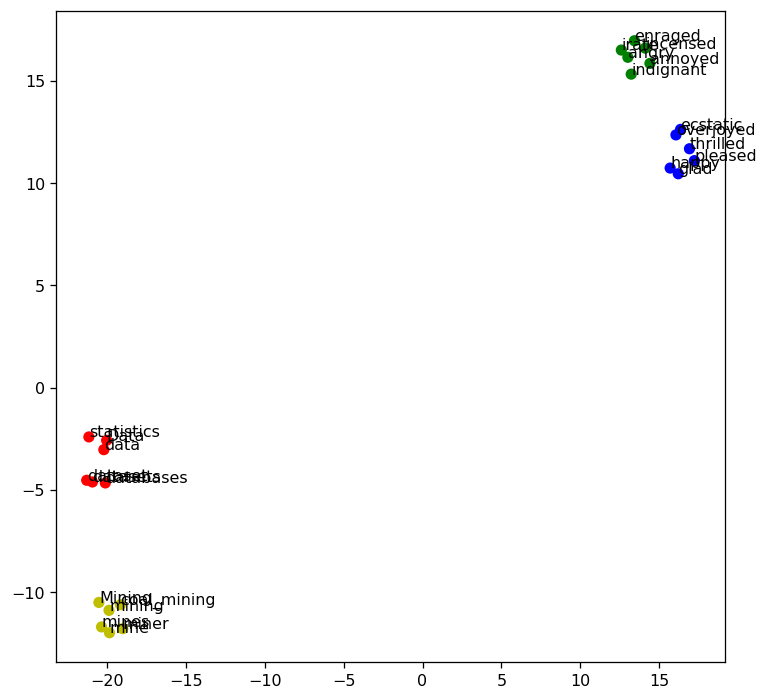

In [63]:
# clustering
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

model = w2v_google_model

size = 200
target_size = len(target_words)
all_word = list(model.key_to_index.keys())
word_train = target_words + all_word[:size]
X_train = model[word_train]

tsne = TSNE(n_components=2, metric='cosine', random_state=28)

X_tsne = tsne.fit_transform(X_train)

plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0), textcoords='offset points')
plt.show()

### ** >>> Exercise 8 (Take home): **  

In [64]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 15
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]        
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'information', 'database', 'Data_System_IPEDS', 'data.The', 'OpenSpirit_enabled', 'datafeeds', 'microdata', 'operator_Telecity', 'GT_Datamaker', 'datawarehouse']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner', 'uranium_mining', 'miners', 'Mountaintop_removal_coal', 'goldmining', 'alluvial_mining', 'Ok_Tedi_copper', 'uranium_mines', 'coal_mines', 'openpit_mining', 'Mines']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted

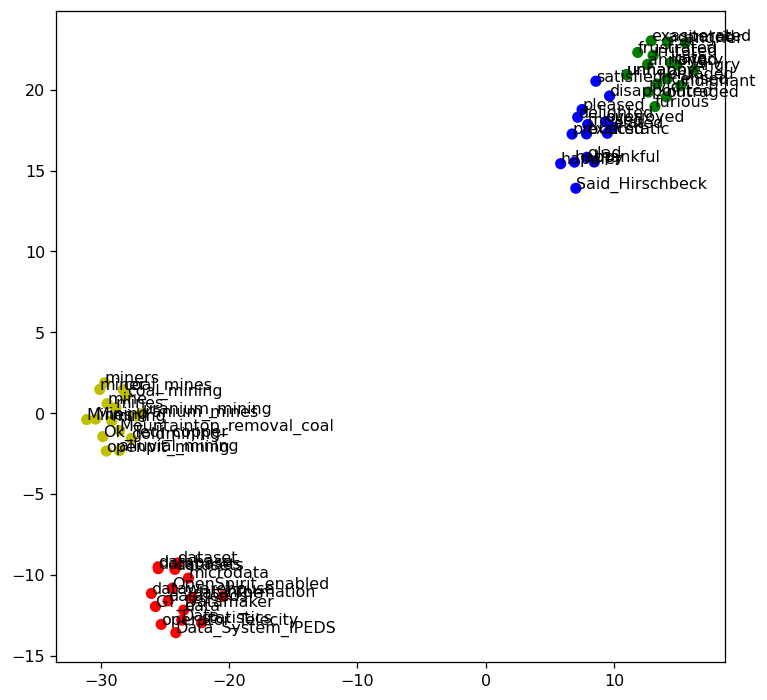

In [65]:
## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.key_to_index.keys())
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

# Kaggle

Firstly, I did some data preprocessing and data exploraration for later convenience. For example, I added and dropped some columns in tweets_dm.json. This helped me to perceieve data easier and know what they are for. I also generated a bar plot to make it able to see the data distribution in emotions at glance. In the model part, I used the bag of words approach first to vectorize and tokenize texts in tweets in order to make them able to train. Then I prepared training and test data sets for predictions and evaluations. The first model I used was the decision tree. It is handy and a good starter for classification problems. The result was not sound than I expected. Since I didn't have much time to run it with other max_feature settings, but I assumed 5000 would be a little too much; it could cause overfitting. Then I used the MNB model. It generated the similar result with the decision tree. The MLP model gave the best performance among all models I tried. I also tried to use other methods, such as k-means, but I gave up because of time constraints. If I had more time for this, I would change some parameters and try other models to see how it goes. Overall, it was a fun but challenging experiece for me. I would like to participate in other competitions if I have chances to improve my understanding and skills in data mining/science.

## Preprocessing & Exploratory data analysis (EDA)

In [66]:
# set a directory
import os
os.getcwd()
new_wd = r'C:\Users\Hiro\Documents\Courses\Data Mining\DMLab2\DM2021-Lab2-HW2\Kaggle\dm2021-lab2-hw2'
os.chdir(new_wd)
os.getcwd()

'C:\\Users\\Hiro\\Documents\\Courses\\Data Mining\\DMLab2\\DM2021-Lab2-HW2\\Kaggle\\dm2021-lab2-hw2'

In [67]:
# import datasets
path_to_tweet_DM = r'tweets_DM.json'
tweet_df = pd.read_json(path_to_tweet_DM, lines=True)
tweet_df

,_score,_index,_source,_crawldate,_type
0,391,hashtag_tweets,"{'tweet': {'hashtags': ['Snapchat'], 'tweet_id...",2015-05-23 11:42:47,tweets
1,433,hashtag_tweets,"{'tweet': {'hashtags': ['freepress', 'TrumpLeg...",2016-01-28 04:52:09,tweets
2,232,hashtag_tweets,"{'tweet': {'hashtags': ['bibleverse'], 'tweet_...",2017-12-25 04:39:20,tweets
3,376,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x1cd5...",2016-01-24 23:53:05,tweets
4,989,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x2de2...",2016-01-08 17:18:59,tweets
...,...,...,...,...,...
1867530,827,hashtag_tweets,"{'tweet': {'hashtags': ['mixedfeeling', 'butim...",2015-05-12 12:51:52,tweets
1867531,368,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x29d0...",2017-10-02 17:54:04,tweets
1867532,498,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x2a6a...",2016-10-10 11:04:32,tweets
1867533,840,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x24fa...",2016-09-02 14:25:06,tweets


In [68]:
emotion_df = pd.read_csv('emotion.csv')
emotion_df

,tweet_id,emotion
0,0x3140b1,sadness
1,0x368b73,disgust
2,0x296183,anticipation
3,0x2bd6e1,joy
4,0x2ee1dd,anticipation
...,...,...
1455558,0x38dba0,joy
1455559,0x300ea2,joy
1455560,0x360b99,fear
1455561,0x22eecf,joy


In [69]:
ident_df = pd.read_csv('data_identification.csv')
ident_df

,tweet_id,identification
0,0x28cc61,test
1,0x29e452,train
2,0x2b3819,train
3,0x2db41f,test
4,0x2a2acc,train
...,...,...
1867530,0x227e25,train
1867531,0x293813,train
1867532,0x1e1a7e,train
1867533,0x2156a5,train


In [70]:
tweet_id = []
text = []
for source in tweet_df['_source']:
    tweet_id.append(source['tweet']['tweet_id'])
    text.append(source['tweet']['text'])

# create new columns
tweet_df['tweet_id'] = tweet_id
tweet_df['text'] = text

tweet_df.head(3)

,_score,_index,_source,_crawldate,_type,tweet_id,text
0,391,hashtag_tweets,"{'tweet': {'hashtags': ['Snapchat'], 'tweet_id...",2015-05-23 11:42:47,tweets,0x376b20,"People who post ""add me on #Snapchat"" must be ..."
1,433,hashtag_tweets,"{'tweet': {'hashtags': ['freepress', 'TrumpLeg...",2016-01-28 04:52:09,tweets,0x2d5350,"@brianklaas As we see, Trump is dangerous to #..."
2,232,hashtag_tweets,"{'tweet': {'hashtags': ['bibleverse'], 'tweet_...",2017-12-25 04:39:20,tweets,0x28b412,"Confident of your obedience, I write to you, k..."


In [71]:
# drop unnecessary columns
tweet_df.drop(['_score', '_index', '_source', '_crawldate', '_type'],
    axis=1, inplace=True)
tweet_df.head(3)

,tweet_id,text
0,0x376b20,"People who post ""add me on #Snapchat"" must be ..."
1,0x2d5350,"@brianklaas As we see, Trump is dangerous to #..."
2,0x28b412,"Confident of your obedience, I write to you, k..."


In [72]:
# classify training and testing dataset 
ident_train = ident_df[ident_df['identification'] == 'train']
ident_test = ident_df[ident_df['identification'] == 'test']
tweet_train = tweet_df[tweet_df['tweet_id'].isin(ident_train['tweet_id'])].reset_index(drop=True)
tweet_test = tweet_df[tweet_df['tweet_id'].isin(ident_test['tweet_id'])].reset_index(drop=True)

In [73]:
tweet_test

,tweet_id,text
0,0x28b412,"Confident of your obedience, I write to you, k..."
1,0x2de201,"""Trust is not the same as faith. A friend is s..."
2,0x218443,When do you have enough ? When are you satisfi...
3,0x2939d5,"God woke you up, now chase the day #GodsPlan #..."
4,0x26289a,"In these tough times, who do YOU turn to as yo..."
...,...,...
411967,0x2913b4,"""For this is the message that ye heard from th..."
411968,0x2a980e,"""There is a lad here, which hath five barley l..."
411969,0x316b80,When you buy the last 2 tickets remaining for ...
411970,0x29d0cb,I swear all this hard work gone pay off one da...


In [74]:
tweet_train = tweet_train.sort_values(by=['tweet_id']).reset_index(drop=True)
tweet_train

,tweet_id,text
0,0x1c7f10,o m g Shut Up And Dance though #BlackMirror <LH>
1,0x1c7f11,On #twitch <LH> on the #Destinybeta #Destiny #...
2,0x1c7f14,A nice sunny wak this morning not many <LH> ar...
3,0x1c7f15,I'm one of those people who love candy corn......
4,0x1c7f16,@metmuseum What are these? They look like some...
...,...,...
1455558,0x38fe18,@LJPBR @FifthHarmony Um My vote For @FifthHar...
1455559,0x38fe19,Where is #WesHoolahan?! #WALvIRL #COYBIG <LH>
1455560,0x38fe1a,@mattmfm Fake news! <LH> propagated by Tumpkin...
1455561,0x38fe1c,..today was brutal ..#Hungover


In [75]:

emotion_df = emotion_df.sort_values(by=['tweet_id']).reset_index(drop=True)
tweet_train['emotion'] = emotion_df['emotion']
tweet_train


,tweet_id,text,emotion
0,0x1c7f10,o m g Shut Up And Dance though #BlackMirror <LH>,joy
1,0x1c7f11,On #twitch <LH> on the #Destinybeta #Destiny #...,anticipation
2,0x1c7f14,A nice sunny wak this morning not many <LH> ar...,joy
3,0x1c7f15,I'm one of those people who love candy corn......,joy
4,0x1c7f16,@metmuseum What are these? They look like some...,disgust
...,...,...,...
1455558,0x38fe18,@LJPBR @FifthHarmony Um My vote For @FifthHar...,sadness
1455559,0x38fe19,Where is #WesHoolahan?! #WALvIRL #COYBIG <LH>,anticipation
1455560,0x38fe1a,@mattmfm Fake news! <LH> propagated by Tumpkin...,surprise
1455561,0x38fe1c,..today was brutal ..#Hungover,disgust


In [76]:
# lower the texts 
tweet_train['text'] = tweet_train['text'].str.lower()
tweet_train

,tweet_id,text,emotion
0,0x1c7f10,o m g shut up and dance though #blackmirror <lh>,joy
1,0x1c7f11,on #twitch <lh> on the #destinybeta #destiny #...,anticipation
2,0x1c7f14,a nice sunny wak this morning not many <lh> ar...,joy
3,0x1c7f15,i'm one of those people who love candy corn......,joy
4,0x1c7f16,@metmuseum what are these? they look like some...,disgust
...,...,...,...
1455558,0x38fe18,@ljpbr @fifthharmony um my vote for @fifthhar...,sadness
1455559,0x38fe19,where is #weshoolahan?! #walvirl #coybig <lh>,anticipation
1455560,0x38fe1a,@mattmfm fake news! <lh> propagated by tumpkin...,surprise
1455561,0x38fe1c,..today was brutal ..#hungover,disgust


In [77]:
# copy data in the case of wrong executions 
tweet_train_copy = tweet_train.copy()
tweet_test_copy = tweet_test.copy()
tweet_train_copy

,tweet_id,text,emotion
0,0x1c7f10,o m g shut up and dance though #blackmirror <lh>,joy
1,0x1c7f11,on #twitch <lh> on the #destinybeta #destiny #...,anticipation
2,0x1c7f14,a nice sunny wak this morning not many <lh> ar...,joy
3,0x1c7f15,i'm one of those people who love candy corn......,joy
4,0x1c7f16,@metmuseum what are these? they look like some...,disgust
...,...,...,...
1455558,0x38fe18,@ljpbr @fifthharmony um my vote for @fifthhar...,sadness
1455559,0x38fe19,where is #weshoolahan?! #walvirl #coybig <lh>,anticipation
1455560,0x38fe1a,@mattmfm fake news! <lh> propagated by tumpkin...,surprise
1455561,0x38fe1c,..today was brutal ..#hungover,disgust


In [78]:
# check the freq of emotions
tweet_train_copy.groupby(['emotion']).count()

,tweet_id,text
emotion,,
anger,39867,39867
anticipation,248935,248935
disgust,139101,139101
fear,63999,63999
joy,516017,516017
sadness,193437,193437
surprise,48729,48729
trust,205478,205478


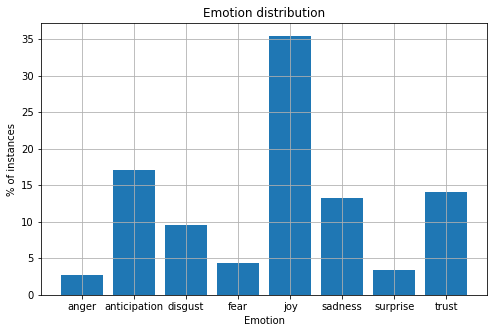

In [79]:
# visualize emotion distribution
labels = tweet_train_copy['emotion'].unique()
post_total = len(tweet_train_copy)
df1 = tweet_train_copy.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total, 3))

fig, ax = plt.subplots(figsize=(8,5))
plt.bar(df1.index, df1.values)

plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

## Models

### Decision Trees

In [80]:
# bag of words
BOW_5000 = CountVectorizer(max_features=5000, tokenizer=nltk.word_tokenize) 

BOW_5000.fit(tweet_train_copy['text'])
BOW_5000

CountVectorizer(max_features=5000,
                tokenizer=<function word_tokenize at 0x0000020E85B538B8>)

In [95]:
# split data into train and test
from sklearn.tree import DecisionTreeClassifier

BOW_X_train = BOW_5000.transform(tweet_train_copy['text'])
BOW_Y_train = tweet_train_copy['emotion']

BOW_X_test = BOW_5000.transform(tweet_test_copy['text'])
# Y_test - emotion_df['emotion']

print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
# print('y_test.shape: ', y_test.shape)

X_train.shape:  (1455563, 5000)
y_train.shape:  (3613, 4)
X_test.shape:  (411972, 5000)


In [ ]:
# decision tree
DT_model = DecisionTreeClassifier(random_state=0)

DT_model = DT_model.fit(BOW_X_train, BOW_Y_train)

DT_y_train_pred = DT_model.predict(BOW_X_train)
DT_y_test_pred = DT_model.predict(BOW_X_test)

DT_y_test_pred[:20]

In [93]:
# to submission format 
def to_submission_format(test_pred, csv_title=''):
    submission_format = {'id': tweet_test['tweet_id'], 'emotion': test_pred}
    to_df = pd.DataFrame(submission_format)
    return to_df.to_csv(csv_title+'.csv', index=False)

### MNB

In [86]:
# MNB
from sklearn.naive_bayes import MultinomialNB

MNB_model = MultinomialNB()
MNB_model = MNB_model.fit(BOW_X_train, BOW_Y_train)

MNB_y_train_pred = MNB_model.predict(BOW_X_train)
MNB_y_test_pred = MNB_model.predict(BOW_X_test)

print(MNB_y_test_pred[:10])

# to_submission_format(MNB_y_test_pred, 'MNB_model')

['anticipation' 'anticipation' 'disgust' 'joy' 'anticipation' 'sadness'
 'surprise' 'disgust' 'sadness' 'sadness']


### TF-IDF

In [87]:
# TF-IDF
tfidf_model = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize, 
    stop_words=nltk.corpus.stopwords.words('english'))

tfidf_model = tfidf_model.fit(tweet_train_copy['text'])

In [88]:
tfidf_X_train = tfidf_model.transform(tweet_train_copy['text'])
Y_train = tweet_train_copy['emotion']

tf_idf_X_test = tfidf_model.transform(tweet_test_copy['text'])

### Word2Vec

In [89]:
# word2vec
tweet_train_copy['text_tokenized'] = tweet_train_copy['text'].apply(lambda x: nltk.word_tokenize(x))
tweet_train_copy[['tweet_id', 'text', 'text_tokenized']].head()

,tweet_id,text,text_tokenized
0,0x1c7f10,o m g shut up and dance though #blackmirror <lh>,"[o, m, g, shut, up, and, dance, though, #, bla..."
1,0x1c7f11,on #twitch <lh> on the #destinybeta #destiny #...,"[on, #, twitch, <, lh, >, on, the, #, destinyb..."
2,0x1c7f14,a nice sunny wak this morning not many <lh> ar...,"[a, nice, sunny, wak, this, morning, not, many..."
3,0x1c7f15,i'm one of those people who love candy corn......,"[i, 'm, one, of, those, people, who, love, can..."
4,0x1c7f16,@metmuseum what are these? they look like some...,"[@, metmuseum, what, are, these, ?, they, look..."


In [90]:
training_corpus = tweet_train_copy['text_tokenized'].values
training_corpus[:3]

array([list(['o', 'm', 'g', 'shut', 'up', 'and', 'dance', 'though', '#', 'blackmirror', '<', 'lh', '>']),
       list(['on', '#', 'twitch', '<', 'lh', '>', 'on', 'the', '#', 'destinybeta', '#', 'destiny', '#', 'destiny2', '#', 'destinythegame', '#', 'hunter', '#', 'titan', '#', 'warlock', '#', 'destiny2thegame', '#', 'beta', '#', 'destiny2beta', '#', 'ps4']),
       list(['a', 'nice', 'sunny', 'wak', 'this', 'morning', 'not', 'many', '<', 'lh', '>', 'aroud', ',', 'a', 'few', 'whites', 'only', '.', 'then', 'time', 'in', 'the', 'garden', 'weeding', ',', 'it', 'really', 'needed', 'it', '.', ':', ')'])],
      dtype=object)

In [91]:
vector_dim = 100
window_size = 5
min_count = 1
training_iter = 20

word2vec_model = Word2Vec(sentences=training_corpus,
                          vector_size=vector_dim,
                          window=window_size,
                          min_count=min_count,
                          epochs=training_iter)

### K-means

In [ ]:
target_list = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']
print('target words: ', target_list )

X = [word2vec_model.wv[word] for word in target_list]

k = 8

kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(X)

cluster_result = kmeans_model.labels_

for i in range(len(target_list)):
    print('word: {} \t cluster: {}'.format(target_list[i], cluster_result[i]))

target words:  ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']


array([1, 7, 2, 5, 0, 6, 4, 3])

In [ ]:
word = 'grief'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

[6]

In [ ]:
kmeans_pred = kmeans_model.predict(X)
kmeans_pred

array([5, 1, 7, 0, 3, 6, 4, 2])

In [ ]:
target_list = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']
print('target words: ', target_list )

X = [word2vec_model.wv[word] for word in target_list]

k = 8

Z = [word2vec_model.wv[word] for word in tweet_train_copy['text_tokenized']]

kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(Z, X)

kmeans_y_train_pred = kmeans_model.predict(Z)
kmeans_y_test_pred = kmeans_model.predict(X)

target words:  ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']


### MLP

In [99]:
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

mlp_model = MLPClassifier(hidden_layer_sizes=(64, 64, 20), activation='relu', solver='adam', batch_size='auto',
    learning_rate_init=0.01, max_iter=200, tol=1e-2, random_state=1, early_stopping=True)

mlp_model.fit(BOW_X_train, BOW_Y_train)
mlp_y_test_pred = mlp_model.predict(BOW_X_test)

to_submission_format(mlp_y_test_pred, 'MLP_model')